# 剛体のキネマティクス II

前項では、**オイラー角**・**DCM**を用いた剛体の姿勢表現について学んだ。本稿では、以下の姿勢パラメータを用いた姿勢表現について学んでいこう。

- **Principal Rotation Vectors**
- **クォータニオン（オイラーパラメータ）**

:::{admonition} 項目 
:class: note
- 3.1) Principal Rotation Vector
- 3.2) クォータニオン（オイラーパラメータ）
:::

:::{admonition} 目的 
:class: tip
- Principal Rotation Vector・クォータニオンの定義・性質を理解する。
- DCM・オイラー角など他の姿勢パラメータとの相互変換を理解する。
- 各種姿勢パラメータの利点・欠点を整理し、場合に応じて適切に使い分けられるようになる。
- クォータニオンを用いた姿勢の加減算を実施できるようになる。
- 時間経過に伴うクォータニオンの変化を数値積分を用いて求める。
:::

---

In [2]:
# Import Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
'''
The definitions of Rotation Matrices
--------------------------------------------------------------------------------------------------------------------------------------------------------
    - The rotation abt the 1st principle axis (x-axis) is defined by the angle 'psi'
    - The rotation abt the 2nd principle axis (y-axis) is defined by the angle 'theta'
    - The rotation abt the 3rd principle axis (z-axis) is defined by the angle 'phi'
'''

def rotation_matrix_x(phi, transformation_type='passive'):
    """Generate rotation matrix for a roll (rotation about the x-axis).
    
    Args:
        phi (float): The angle of rotation in degrees.
        transformation_type (str): Specifies the type of transformation, 'passive' (default) or 'active'.
    
    Returns:
        numpy.ndarray: The rotation matrix for x-axis rotation.
    """
    phi = np.radians(phi)
    c, s = np.cos(phi), np.sin(phi)
    matrix = np.array([[1, 0, 0], 
                       [0, c, s], 
                       [0, -s, c]])
    if transformation_type == 'active':
        return matrix.T
    return matrix

def rotation_matrix_y(theta, transformation_type='passive'):
    """Generate rotation matrix for a pitch (rotation about the y-axis).
    
    Args:
        theta (float): The angle of rotation in degrees.
        transformation_type (str): Specifies the type of transformation, 'passive' (default) or 'active'.
    
    Returns:
        numpy.ndarray: The rotation matrix for y-axis rotation.
    """
    theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta)
    matrix = np.array([[c, 0, -s], 
                       [0, 1, 0], 
                       [s, 0, c]])
    if transformation_type == 'active':
        return matrix.T
    return matrix

def rotation_matrix_z(psi, transformation_type='passive'):
    """Generate rotation matrix for a yaw (rotation about the z-axis).
    
    Args:
        psi (float): The angle of rotation in degrees.
        transformation_type (str): Specifies the type of transformation, 'passive' (default) or 'active'.
    
    Returns:
        numpy.ndarray: The rotation matrix for z-axis rotation.
    """
    psi = np.radians(psi)
    c, s = np.cos(psi), np.sin(psi)
    matrix = np.array([[c, s, 0], 
                       [-s, c, 0], 
                       [0, 0, 1]])
    if transformation_type == 'active':
        return matrix.T
    return matrix

## 3.1) Principal Rotation Vectors

### 3.1.1) - オイラーの回転定理

````{prf:theorem} オイラーの回転定理
:label: euler-theorem
3次元空間の任意の回転は、ある回転軸周りのある回転角$\Phi$の回転で表すことができる。
````
このオイラーの回転定理における回転軸を **主軸(Principal Rotation Vector)** と呼ぶことにする。
このとき、回転後の座標系 $\mathcal{B}$ と回転前の座標系 $\mathcal{N}$ の両方において、主軸 $\hat{e}$ は同じベクトル成分を持つため、

$$
\hat{e} = e_{b1} \hat{b}_1 + e_{b2} \hat{b}_2 + e_{b3} \hat{b}_3 \\
$$

$$
\hat{e} = e_{n1} \hat{n}_1 + e_{n2} \hat{n}_2 + e_{n3} \hat{n}_3 \\
$$
とおくと、
$$
e_{bi} = e_{ni} = e_i
$$
が成り立つ。
回転行列 $[C]$ を用いることで、$\mathcal{B}$ 座標系および $\mathcal{N}$ 座標系における $\hat{e}$ の座標成分は以下の関係を持つ。

$$
\begin{bmatrix}
e_1 \\
e_2 \\
e_3
\end{bmatrix}
=
[C]
\begin{bmatrix}
e_1 \\
e_2 \\
e_3
\end{bmatrix}
$$

**<ins>固有ベクトルとしての主軸</ins>**<br>
式　から、$\hat{e}$ は回転行列 $[C]$ の固有値 +1 に対応する固有ベクトルであることが明らかである。したがって、回転行列 $[C]$ が固有値 +1を持つことが分かれば、オイラーの定理を示すことができる。$[C]$ の固有値を $\lambda$ とおくと、特性方程式は

$$
\left|C-\lambda I\right|=0
$$

となる。$[C]$が$3\times3$の直交行列であること利用すると、

$$
-(\lambda-1)\left\{\lambda^2-\left(\operatorname{tr} C-1\right) \lambda+1\right\}=0
$$
と整理される。確かに$[C]$は固有値+1を持つため、オイラーの定理が示された。

なお、回転は以下の 4 通りが考えられる。

1. $(\hat{e}, \Phi)$
2. $(-\hat{e}, -\Phi)$
3. $(\hat{e}, \Phi')$
4. $(-\hat{e}, -\Phi')$

ここで、$\Phi' = \Phi - 2\pi$ である。



### 3.1.2) - DCMとの関係性

**<ins>DCM と Principal Rotation Vectors(PRV) の関係</ins>**<br>
$[C]$ は 回転軸成分 $e_1, e_2, e_3$ ・回転角 $\Phi$ を用いて次のように表現できる。

$$
[C] = \begin{bmatrix}
e_1^2 \Sigma + c\Phi & e_1e_2 \Sigma + e_3s\Phi & e_1e_3 \Sigma - e_2s\Phi \\
e_2e_1 \Sigma - e_3s\Phi & e_2^2 \Sigma + c\Phi & e_2e_3 \Sigma + e_1s\Phi \\
e_3e_1 \Sigma + e_2s\Phi & e_3e_2 \Sigma - e_1s\Phi & e_3^2 \Sigma + c\Phi
\end{bmatrix}
$$

ここで、$\Sigma = 1 - c\Phi$, $s\Phi = \sin{\Phi}$, $c\Phi = \cos{\Phi}$ である。
これは、[ロドリゲスの回転公式](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%83%89%E3%83%AA%E3%82%B2%E3%82%B9%E3%81%AE%E5%9B%9E%E8%BB%A2%E5%85%AC%E5%BC%8F)と呼ばれている。


逆変換として、$[C]$ から PRV を求めると、

$$
\cos\Phi = \frac{1}{2} (C_{11} + C_{22} + C_{33} - 1)
$$

$$
\hat{e} 
=
\begin{bmatrix}
e_1 \\
e_2 \\
e_3
\end{bmatrix}
=
\frac{1}{2\sin\Phi}
\begin{bmatrix}
C_{23} - C_{32} \\
C_{31} - C_{13} \\
C_{12} - C_{21}
\end{bmatrix}
$$

ただし、$\Phi' = \Phi - 2\pi$ である。



:::{admonition} 問題1. DCMとPRVの相互変換
:class: important
DCM→PRV、PRV→DCMの変換を行う関数をそれぞれ実装せよ。
:::

In [16]:
def prv_to_rotation_matrix(e, phi_deg):
    """
    Converts a Principal Rotation Vector (PRV) to a rotation matrix.

    Args:
        e (np.array)   : The unit vector of the PRV.
        phi_deg (float): The rotation angle of the PRV in degrees.

    Returns:
        np.array: A 3x3 rotation matrix.
    """
    # Convert the angle from degrees to radians
    phi_rad = np.radians(phi_deg)
    
    # Calculate the cosine and sine of the angle
    c_phi = np.cos(phi_rad)
    s_phi = np.sin(phi_rad)
    
    # Calculate the matrix Sigma
    Sigma = 1 - c_phi

    # Ensure e is a float array to avoid UFuncTypeError during in-place operations
    e = np.array(e, dtype=float)
    
    # Normalize e vector to ensure it's a valid unit vector
    e /= np.linalg.norm(e)
    
    # Decompose the unit vector into its components
    e1, e2, e3 = e
    
    # Construct the rotation matrix using the given formula
    C = np.array([[((e1**2)*Sigma + c_phi), (e1*e2*Sigma + e3*s_phi), (e1*e3*Sigma - e2*s_phi)],
                  [(e2*e1*Sigma - e3*s_phi), ((e2**2)*Sigma + c_phi), (e2*e3*Sigma + e1*s_phi)],
                  [(e3*e1*Sigma + e2*s_phi), (e3*e2*Sigma - e1*s_phi), ((e3**2)*Sigma + c_phi)]])

    return C

In [17]:
def rotation_matrix_to_prv(C):
    """
    Converts a rotation matrix to a Principal Rotation Vector (PRV).

    Args:
        C (np.array): A 3x3 rotation matrix.

    Returns:
        tuple: A PRV represented as (e_vector, phi_angle).
    """
    # Compute the angle phi from the trace of the rotation matrix
    trace_C = np.trace(C)
    phi = np.arccos((trace_C - 1) / 2)
    
    # Handle edge cases where phi is 0 or π
    if np.isclose(phi, 0) or np.isclose(phi, np.pi):
        
        # For phi=0, no rotation, the axis can be arbitrary, choose x-axis for simplicity
        # For phi=π, rotation by 180 degrees, find axis by identifying non-zero component
        e = np.array([1, 0, 0])  # Arbitrary axis, could also check for non-diagonal elements
    
    else:
        # Compute the unit vector e from the off-diagonal elements of the matrix C
        e = (1 / (2 * np.sin(phi))) * np.array([C[1, 2] - C[2, 1],
                                                C[2, 0] - C[0, 2],
                                                C[0, 1] - C[1, 0]])
        # Normalize the unit vector to ensure it's a valid unit vector
        e /= np.linalg.norm(e)

    # Ensure the angle phi is in the range [0, 2*pi)
    phi = np.mod(phi, 2 * np.pi)
    phi = np.rad2deg(phi)

    return e, phi

:::{admonition} 問題2. PRVからDCMへの変換
:class: important
任意の回転を表すPRVは以下の2種類が存在した。

1. $(\hat{e}, \Phi)$
2. $(-\hat{e}, -\Phi)$

適当な$\hat{e}$, $\Phi$を与え、2種類のPRVをDCMに変換したものが一致することを確認せよ。
:::

In [18]:
'''
Concept check on PRV and DCM Relation - Question 4
Given the PRV and Angle, check if the DCMs are all equal
'''
c = prv_to_rotation_matrix(np.array([1,0,0]), 30)
print(c)
print('--------------------------------------')

c_1 = prv_to_rotation_matrix(np.array([-1,0,0]), -30)
print(c_1)

[[ 1.         0.         0.       ]
 [ 0.         0.8660254  0.5      ]
 [ 0.        -0.5        0.8660254]]
--------------------------------------
[[ 1.        -0.         0.       ]
 [ 0.         0.8660254  0.5      ]
 [-0.        -0.5        0.8660254]]


:::{admonition} 問題3. DCMからPRVへの変換
:class: important
問題2で算出したDCMをPRVに変換し、元のPRVに一致することを確認せよ。
:::

In [19]:
C = np.array([[ 1, 0, 0],
              [0, 0.8660254, 0.5],
              [0, -0.5, 0.8660254]])

e, phi = rotation_matrix_to_prv(C)
print(f"PRV:\t{e}")
print(f"Phi:\t{phi}")

PRV:	[1. 0. 0.]
Phi:	30.00000043366474


### 3.1.3) - PRV における加減算

$\Phi_1$ および $\Phi_2$ をそれぞれ最初および 2 番目の PRV の回転角度とし、$\hat{e}_1$ および $\hat{e}_2$ は対応する主回転軸の単位ベクトルであるとする。合成された PRV が、$\Phi$ および $\hat{e}$ によって表されるとき、加減算を以下のように定義する。

**加算**：
$\Phi_1$, $\hat{e}_1$, $\Phi_2$, $\hat{e}_2$ を用いて、$\Phi$ および $\hat{e}$ を表現すること。 

**減算**：
$\Phi$, $\hat{e}$, $\Phi_1$, $\hat{e}_1$ を用いて、$\Phi_2$, $\hat{e}_2$ を表現すること。

※ $\Phi_1$, $\hat{e}_1$ も同様に表現できる。

**<ins>PRV の加算</ins>**<br>

2 つの PRV を加算する方法には以下がある。

- **DCM Method**:
  合成された回転行列は、2 つの回転行列の積として求められる。
  $$
  [FN(\Phi, \hat{e})] = [FB(\Phi_2, \hat{e}_2)] [BN(\Phi_1, \hat{e}_1)]
  $$

- **Direct Method**:
  合成された PRV の角度および軸は次の式で求められる。

  $$
  \Phi = 2 \cos^{-1} \left( \cos \frac{\Phi_1}{2} \cos \frac{\Phi_2}{2} - \sin \frac{\Phi_1}{2} \sin \frac{\Phi_2}{2} \hat{e}_1 \cdot \hat{e}_2 \right)
  $$

  $$
  \hat{e} = \frac{ \cos \frac{\Phi_2}{2} \sin \frac{\Phi_1}{2} \hat{e}_1 + \cos \frac{\Phi_1}{2} \sin \frac{\Phi_2}{2} \hat{e}_2 + \sin \frac{\Phi_1}{2} \sin \frac{\Phi_2}{2} \hat{e}_1 \times \hat{e}_2 }{\sin \frac{\Phi}{2}}
  $$

**<ins>PRV の減算</ins>**<br>

PRVの減算も同様に2つの方法がある。

- **DCM Method**:
  $$
  [FB(\Phi_2, \hat{e_2})] = [FN(\Phi, \hat{e})] [BN(\Phi_1, \hat{e}_1)]^T
  $$

- **Direct Method**:
  
  $$
  \Phi_2 = 2 \cos^{-1} \left( \cos \frac{\Phi}{2} \cos \frac{\Phi_1}{2} + \sin \frac{\Phi}{2} \sin \frac{\Phi_1}{2} \hat{e} \cdot \hat{e}_1 \right)
  $$

  $$
  \hat{e}_2 = \frac{1}{\sin \frac{\Phi_2}{2}}
  \left(
  \cos \frac{\Phi_1}{2} \sin \frac{\Phi}{2} \hat{e}
  - \cos \frac{\Phi}{2} \sin \frac{\Phi_1}{2} \hat{e}_1
  + \sin \frac{\Phi}{2} \sin \frac{\Phi_1}{2} \hat{e} \times \hat{e}_1
  \right)
  $$

ここで、$\Phi_1$ および $\Phi_2$ はそれぞれ最初および 2 番目の PRV の回転角度を表し、$\hat{e}_1$ および $\hat{e}_2$ は対応する主回転軸の単位ベクトルである。合成された PRV は、$\Phi$ および $\hat{e}$ によって表される。




### 3.1.4) - PRV のキネマティクス微分法方程式

**<ins>角速度ベクトルと PRV 速度のマッピング</ins>**<br>

- **剛体の角速度ベクトルから PRV 速度へのマッピング**:

  $$
  \dot{\gamma} = \left[ I_{3 \times 3} + \frac{1}{2} \left[ \tilde{\gamma} \right] + \frac{1}{\Phi^2} \left( 1 - \frac{\Phi}{2} \cot \left( \frac{\Phi}{2} \right) \right) \left[ \tilde{\gamma} \right]^2 \right] \omega_{B}
  $$

- **PRV 速度から剛体の角速度ベクトルへのマッピング**:

  $$
  \omega_{B} = \left[ I_{3 \times 3} - \left( 1 - \cos \Phi \right) \frac{1}{\Phi^2} \left[ \tilde{\gamma} \right] + \left( \Phi - \sin \Phi \right) \frac{1}{\Phi^3} \left[ \tilde{\gamma} \right]^2 \right] \dot{\gamma}
  $$


## 3.2) クォータニオン

**クォータニオン**（**オイラーパラメータ**とも呼ばれる）は、3 次元空間における回転を表現するための数体系である。クォータニオンを利用することで、オイラー角を使用する際に発生する **ジンバルロック** のような特異点を回避しながら、回転を記述することができる。クォータニオンは、計算効率の高さから、宇宙機・ロボティクスの姿勢制御などの分野で広く利用されている。

**<ins>歴史的経緯</ins>**

- **レオンハルト・オイラー（1776）**: [オイラー](https://ja.wikipedia.org/wiki/%E3%83%AC%E3%82%AA%E3%83%B3%E3%83%8F%E3%83%AB%E3%83%88%E3%83%BB%E3%82%AA%E3%82%A4%E3%83%A9%E3%83%BC)は **オイラーの回転定理** を提唱し、**任意の 3D 回転は、特定の軸の周りでの 1 回の回転として表現できる** ことを数学的に示した。この定理は、3D 回転の概念を単一の軸角表現に単純化するものだったが、ベクトルの実際の回転を行う方法については示されていなかった。　

- **オランダ・ロドリゲス（1840）**: [ロドリゲス](https://en.wikipedia.org/wiki/Olinde_Rodrigues)はオイラーの研究を発展させ、**ロドリゲスの回転公式** として知られる幾何学的な公式を提案した。これは、ある軸を中心に特定の角度でベクトルを回転させる際の計算方法を提供し、オイラーの抽象的な定理を実用的に応用できるようにした。

- **ウィリアム・ローワン・ハミルトン（1843）**: [ハミルトン](https://ja.wikipedia.org/wiki/%E3%82%A6%E3%82%A3%E3%83%AA%E3%82%A2%E3%83%A0%E3%83%BB%E3%83%AD%E3%83%BC%E3%83%AF%E3%83%B3%E3%83%BB%E3%83%8F%E3%83%9F%E3%83%AB%E3%83%88%E3%83%B3)は、オイラー・ロドリゲスパラメータを拡張した **クォータニオン** を開発した。クォータニオンは、実数 1 つと 3 つの虚数成分から構成され、次のように表される。

  $$ q = a + bi + cj + dk $$

  ここで、\(a, b, c, d\) は実数であり、\(i, j, k\) は虚数単位である。クォータニオンは 3D 回転の記述にとどまらず、数学や物理学における広範な代数体系の一部である。しかし、姿勢ダイナミクスにおいては、**ジンバルロックを回避しながら効率的に回転を計算する手段** として活用される。クォータニオンはスムーズで安定した 3D 回転を可能にするため、宇宙機制御や 3D コンピュータグラフィックスなどの分野で不可欠な技術となっている。


**<ins>オイラー、ロドリゲス、ハミルトンの比較</ins>**

- **オイラー（1776）** は **有限回転定理** によって、3D 回転が単一の軸の周りで発生することを示したが、これはあくまで概念的な枠組みであった。
  
- **ロドリゲス（1840）** は、オイラーの理論を具体化し、**ロドリゲスの回転公式** を用いて **ベクトルを回転させる実際の計算方法** を提供した。

- **ハミルトン（1843）** は、**クォータニオン** というより一般的な代数構造を開発し、その一部を 3D 回転の表現に応用した。クォータニオンは回転の計算を効率化し、計算上の曖昧さを解消する点で極めて有用である。




### 3.2.1) - クォータニオン の定義・性質

**<ins>定義</ins>**  
**クォータニオン**（オイラーパラメータとも呼ばれる）は、オイラー角における特異点の問題を回避しながら、三次元空間における回転を表現できる。クォータニオンは以下のように定義される。

- $\beta_0 = \cos(\frac{\phi}{2})$
- $\beta_1 = e_1 \sin(\frac{\phi}{2})$
- $\beta_2 = e_2 \sin(\frac{\phi}{2})$
- $\beta_3 = e_3 \sin(\frac{\phi}{2})$

ここで、$\phi$ は回転角、$e_1, e_2, e_3$ は回転軸に沿った単位ベクトルの成分であり、この単位ベクトルが回転軸の方向を定義する。
なお、スカラー部$\cos(\frac{\phi}{2})$ を第4成分とする表現形式もあり、どちらを採用するかは流派によるが、本稿では上記の定義を採用する。

**<ins>制約条件</ins>**  
オイラー パラメータが有効であるためには、以下の制約を満たす必要がある。

- すべてのオイラー パラメータの二乗和が 1 であること:
  
$$
\beta_0^2 + \beta_1^2 + \beta_2^2 + \beta_3^2 = 1
$$

この条件により、すべてのオイラー パラメータは四次元単位超球面上に拘束されることになる。



```{figure} Images/q-hypersphere.jpg
---
height: 300px
name: q-sphere
---
```

**<ins>PRV との関係とクォータニオンの一意性</ins>**<br>
クォータニオン と主回転ベクトル (PRV) はどちらも 3D 空間での姿勢を表現であり、相互に関係が深い姿勢パラメータである。

- **クォータニオン:** 以下の成分によって定義される。
  - $\beta_0 = \cos(\phi/2)$
  - $\beta_i = e_i \sin(\phi/2)$ （$i=1,2,3$）
  これは、単位ベクトル軸 $e_1, e_2, e_3$ によって定義される回転軸と回転角 $\phi$ によって表現される。<br><br>
- **主回転ベクトル (PRV):** 回転軸と回転角を直接使用して回転を定義する。しかし、クォータニオン と同様に記述は一意ではなく、同じ姿勢に対して 4 通りの異なる表現が可能である。このことは、回転表現に固有の非一意性を示している。

クォータニオン と PRV は、次の 2 つの等価な方法で同じ回転を表すことができる。

1. **正回転と逆回転:**
   - $(e, \phi)$ による回転は、$(-e, -\phi)$ による回転と等価である。これは、ある軸周りの回転が、逆方向の軸周りの逆回転と等価であることから分かる。
   - オイラー パラメータの観点では:
     - $\beta_0' = \cos(-\phi/2) = \cos(\phi/2) = \beta_0$
     - $\beta_i' = -e_i \sin(-\phi/2) = e_i \sin(\phi/2) = \beta_i$ （$i=1,2,3$）<br><br>
2. **代替表現:**
   - もう一つの表現として、$\phi' = \phi - 2\pi$ を考慮することで、同じ姿勢を達成するための遠回りな経路を記述することができる。
   - EP の場合:
     - $\beta_0' = \cos(\phi/2 - \pi) = -\cos(\phi/2) = -\beta_0$
     - $\beta_i' = e_i \sin(\phi/2 - \pi) = -e_i \sin(\phi/2) = -\beta_i$



### 3.2.2) - DCMとの関係

**<ins>クォーとニオンと方向余弦行列 (DCM) の関係</ins>**<br>

3次元空間における回転を表現する上で、クォータニオン と方向余弦行列 (DCM) の関係は基本的なものです。ロドリゲスの回転公式を用いると、DCMは以下のようにクォータニオンを用いて直接表現することができる。

$$
C = \begin{bmatrix}
\beta_0^2 + \beta_1^2 - \beta_2^2 - \beta_3^2 & 2(\beta_1\beta_2 - \beta_0\beta_3) & 2(\beta_1\beta_3 - \beta_0\beta_2) \\
2(\beta_1\beta_2 - \beta_0\beta_3) & \beta_0^2 - \beta_1^2 + \beta_2^2 - \beta_3^2 & 2(\beta_2\beta_3 + \beta_0\beta_1) \\
2(\beta_1\beta_3 + \beta_0\beta_2) & 2(\beta_2\beta_3 - \beta_0\beta_1) & \beta_0^2 - \beta_1^2 - \beta_2^2 + \beta_3^2
\end{bmatrix}
$$

一方、DCMからクォータニオンを抽出する逆の関係は以下の通りです。ただし、$\beta_0 \rightarrow 0$ の場合、特異点を避けるための注意が必要である。

$$
\beta_0 = \pm \frac{1}{2} \sqrt{C_{11} + C_{22} + C_{33} + 1}
$$
$$
\beta_1 = \frac{C_{23} - C_{32}}{4\beta_0}, \quad \beta_2 = \frac{C_{31} - C_{13}}{4\beta_0}, \quad \beta_3 = \frac{C_{12} - C_{21}}{4\beta_0}
$$

<br><br>

**<ins>回転行列からクォータニオン を計算するシェパード法</ins>**<br>

シェパード法は、与えられた方向余弦行列 (DCM) $C$ からクォータニオン を正確に導出するための手法である。この方法は、計算誤差を引き起こす可能性のある小さい数での除算を避け、数値的安定性を確保するために2つの主要なステップから成る。

**_Step 1: クォータニオン各成分の二乗を計算する_**

まず、クォータニオンの各成分の中で最も大きな値を持つものを決定する。これは計算上の不安定性を回避するために不可欠な操作である。

- **$\beta_0$ の二乗**:
  
  $$
  \beta_0^2 = \frac{1 + \text{trace}(C)}{4}
  $$

- **$\beta_1$ の二乗**:
  
  $$
  \beta_1^2 = \frac{1 + 2C_{11} - \text{trace}(C)}{4}
  $$

- **$\beta_2$ の二乗**:
  
  $$
  \beta_2^2 = \frac{1 + 2C_{22} - \text{trace}(C)}{4}
  $$

- **$\beta_3$ の二乗**:
  
  $$
  \beta_3^2 = \frac{1 + 2C_{33} - \text{trace}(C)}{4}
  $$

**_Step 2: 残りのクォータニオン成分を計算する_**

最も大きな $\beta_{i}^2$ を特定した後、その値を基準として、下式を元に残りの成分を算出する。


  $$
  \beta_0\beta_1 = \frac{(C_{23} - C_{32})}{4}
  $$
  $$
  \beta_0\beta_2 = \frac{(C_{31} - C_{13})}{4}
  $$
  $$
  \beta_0\beta_3 = \frac{(C_{12} - C_{21})}{4}
  $$

  $$
  \beta_1\beta_2 = \frac{(C_{12} + C_{21})}{4}
  $$
  $$
  \beta_1\beta_3 = \frac{(C_{13} + C_{31})}{4}
  $$
  $$
  \beta_2\beta_3 = \frac{(C_{23} + C_{32})}{4}
  $$

この手法によって、数値的な安定性を担保しながら、DCMからクォータニオンを計算できる。

:::{admonition} 問題4. クォータニオン・DCMの相互変換
:class: important
クォータニオンからDCMに、DCMからクォータニオンに変換する関数を実装せよ。
なお、クォータニオンの正規化および特異点処理に注意すること。
:::

In [21]:
def quaternion_to_DCM(q):
    """
    Converts a quaternion to a direction cosine matrix (DCM).

    Args:
        q (np.array): A numpy array of size 4 (a row vector) representing the quaternion,
                      where q[0] is the scalar part (beta_0), and q[1], q[2], q[3] are the 
                      vector parts (beta_1, beta_2, beta_3).

    Returns:
        np.array: A 3x3 rotation matrix (DCM).

    Example:
        >>> q = np.array([1, 5, 6, 2])
        >>> quaternion_to_DCM(q)
        array([[ 0.38461538, -0.07692308,  0.91923077],
               [ 0.07692308,  0.99230769, -0.09615385],
               [-0.91923077,  0.09615385,  0.38461538]])
    """
    # Ensure q is a float array to maintain precision
    q = np.array(q, dtype=np.float64)
    
    # Check that the holonomic constraint of quaternion is satisfied, else normalize it
    q_norm = np.linalg.norm(q)
    if not np.isclose(q_norm, 1.0, atol=1e-8):
        q /= q_norm
    
    # Extract components
    q0, q1, q2, q3 = q
    
    # Compute the elements of the DCM
    C = np.array([
        [q0**2 + q1**2 - q2**2 - q3**2, 2 * (q1*q2 + q0*q3),         2 * (q1*q3 - q0*q2)],
        [2 * (q1*q2 - q0*q3),           q0**2 - q1**2 + q2**2 - q3**2, 2 * (q2*q3 + q0*q1)],
        [2 * (q1*q3 + q0*q2),           2 * (q2*q3 - q0*q1),           q0**2 - q1**2 - q2**2 + q3**2]
    ])
    
    return C

# Example usage:
q = np.array([-1, 5, 6, 2])
C = quaternion_to_DCM(q)
print("Direction Cosine Matrix (DCM):\n", C)

Direction Cosine Matrix (DCM):
 [[-0.21212121  0.84848485  0.48484848]
 [ 0.96969697  0.12121212  0.21212121]
 [ 0.12121212  0.51515152 -0.84848485]]


In [22]:
def DCM_to_quaternion(dcm):
    """
    Converts a Direction Cosine Matrix (DCM) to a quaternion using a method to ensure robustness against numerical issues.
    
    Args:
        dcm (np.array): A 3x3 rotation matrix (DCM).
    
    Returns:
        np.array: A quaternion represented as a numpy array of size 4, with the scalar component as the first element.
    
    Example Usage:
        >>> dcm = np.array([[-0.21212121, 0.96969697, 0.12121212],
                            [0.84848485, 0.12121212, 0.51515152],
                            [0.48484848, 0.21212121, -0.84848485]])
        >>> quaternion = DCM_to_quaternion(dcm)
        >>> print(quaternion)
    
    Notes:
    - If the scalar component (q0) is negative, it is flipped to positive. (Ensuring shortes path of rotation)
    - Corresponding vector component is also flipped when q0 is flipped. (Shepperd's Method)
    - Flipping maintains the quaternion's correct rotational encoding.
    - Ensures the quaternion represents a rotation of less than 180 degrees.
    - Adheres to quaternion algebra for accurate 3D rotation representation.
    """
    trace = np.trace(dcm)
    q_squared = np.zeros(4)
    q_squared[0] = (1.0 + trace) / 4.0
    q_squared[1] = (1.0 + 2 * dcm[0, 0] - trace) / 4.0
    q_squared[2] = (1.0 + 2 * dcm[1, 1] - trace) / 4.0
    q_squared[3] = (1.0 + 2 * dcm[2, 2] - trace) / 4.0

    q = np.zeros(4)
    max_index = np.argmax(q_squared)

    if max_index == 0:
        q[0] = np.sqrt(q_squared[0])
        q[1] = (dcm[1, 2] - dcm[2, 1]) / (4 * q[0])
        q[2] = (dcm[2, 0] - dcm[0, 2]) / (4 * q[0])
        q[3] = (dcm[0, 1] - dcm[1, 0]) / (4 * q[0])
    
    elif max_index == 1:
        q[1] = np.sqrt(q_squared[1])
        q[0] = (dcm[1, 2] - dcm[2, 1]) / (4 * q[1])
        if q[0] < 0:
            q[0] = -q[0]
            q[1] = -q[1]
        q[2] = (dcm[0, 1] + dcm[1, 0]) / (4 * q[1])
        q[3] = (dcm[2, 0] + dcm[0, 2]) / (4 * q[1])
        
    elif max_index == 2:
        q[2] = np.sqrt(q_squared[2])
        q[0] = (dcm[2, 0] - dcm[0, 2]) / (4 * q[2])
        if q[0] < 0:
            q[0] = -q[0]
            q[2] = -q[2]
        q[1] = (dcm[0, 1] + dcm[1, 0]) / (4 * q[2])
        q[3] = (dcm[1, 2] + dcm[2, 1]) / (4 * q[2])

    elif max_index == 3:
        q[3] = np.sqrt(q_squared[3])
        q[0] = (dcm[0, 1] - dcm[1, 0]) / (4 * q[3])
        if q[0] < 0:
            q[0] = -q[0]
            q[3] = -q[3]
        q[1] = (dcm[2, 0] + dcm[0, 2]) / (4 * q[3])
        q[2] = (dcm[1, 2] + dcm[2, 1]) / (4 * q[3])
    
    return q

# Example Usage
dcm = np.array([[-0.21212121,  0.84848485,  0.48484848],
                [ 0.96969697,  0.12121212,  0.21212121],
                [ 0.12121212,  0.51515152, -0.84848485]])
quaternion = DCM_to_quaternion(dcm)
print(quaternion)

[ 0.12309149 -0.61545746 -0.73854895 -0.24618298]


In [18]:
# Concept Check 5, 6 - Question 1
q = np.array([0.235702, 0.471405, -0.471405, 0.707107])
C = quaternion_to_DCM(q)
print("Direction Cosine Matrix (DCM):\n", C)

Direction Cosine Matrix (DCM):
 [[-0.44444488 -0.11111228  0.88888975]
 [-0.77777842 -0.44444488 -0.44444535]
 [ 0.44444535 -0.88888975  0.11111039]]


In [23]:
# Concept Check 5, 6 - Question 3
BN = np.array([[-0.529403, -0.467056,  0.708231],
               [-0.474115, -0.529403, -0.703525],
               [ 0.703525, -0.708231,  0.0588291]])
quaternion1 = DCM_to_quaternion(BN)
print(quaternion1)

[ 0.00242542  0.48506963 -0.48506963  0.72760482]


In [24]:
# Concept Check 5, 6 - Question 4
#R =  np.matmul(rotation_matrix_x(-10), np.matmul(rotation_matrix_y(10), rotation_matrix_z(20)))
R = rotation_matrix_x(-10) @ rotation_matrix_y(10) @ rotation_matrix_z(20)
Euler_parameter = DCM_to_quaternion(R)
print(Euler_parameter)

NameError: name 'rotation_matrix_x' is not defined

### 3.2.3) - クォータニオンの加減算

**クォータニオンの加算と減算**

クォータニオンの加減算はDCMに変換することなく直接計算できる。この操作は行列形式で以下のように表現される。

$$
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\beta_3 
\end{bmatrix}
=
\begin{bmatrix}
\beta_0'' & -\beta_1'' & -\beta_2'' & -\beta_3'' \\
\beta_1'' & \beta_0'' & \beta_3'' & -\beta_2'' \\
\beta_2'' & -\beta_3'' & \beta_0'' & \beta_1'' \\
\beta_3'' & \beta_2'' & -\beta_1'' & \beta_0''
\end{bmatrix}
\cdot
\begin{bmatrix}
\beta_0' \\
\beta_1' \\
\beta_2' \\
\beta_3'
\end{bmatrix}
$$

または

$$
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\beta_3 
\end{bmatrix}
=
\begin{bmatrix}
\beta_0'' & \beta_1'' & \beta_2'' & \beta_3'' \\
-\beta_1'' & \beta_0'' & -\beta_3'' & \beta_2'' \\
-\beta_2'' & \beta_3'' & \beta_0'' & -\beta_1'' \\
-\beta_3'' & -\beta_2'' & \beta_1'' & \beta_0''
\end{bmatrix}
\cdot
\begin{bmatrix}
\beta_0' \\
\beta_1' \\
\beta_2' \\
\beta_3'
\end{bmatrix}
$$

この行列演算により、2組のクォータニオンが表す回転操作を加算できる。ここで、プライム ( ' ) とダブルプライム ( '' ) は、それぞれ異なる回転を表す。

また、クォータニオンで表現された2つの回転を減算するためには、4x4行列の直交性を利用して逆行列を求め、$\beta''$または$\beta'$のいずれかを直接解く方法が用いられる。

:::{admonition} 問題5. クォータニオンの加減算
:class: important

回転 $[BN]$, $[FB]$ を表すクォータニオンがそれぞれ、

$$
\begin{bmatrix}
\beta_0' \\
\beta_1' \\
\beta_2' \\
\beta_3' 
\end{bmatrix}
=
\begin{bmatrix}
0.774597 \\
0.258199 \\
0.516398 \\
0.258199 
\end{bmatrix}
$$

$$
\begin{bmatrix}
\beta_0'' \\
\beta_1'' \\
\beta_2'' \\
\beta_3'' 
\end{bmatrix}
=
\begin{bmatrix}
0.359211 \\
0.898027 \\
0.179605 \\
0.179605 
\end{bmatrix}
$$

と表されるとする。上記の加算の公式を用いて、回転$[FN]$に相当するクォータニオンを求めよ。

また、各クォータニオンをDCMに変換して回転$[FN]$を求めた後、クォータニオンに逆変換して、加算公式により算出したクォータニオンと一致することを確かめよ。

In [33]:
def addEP(b1,b2):
    """
    addEP(B1,B2)

    	Q = addEP(B1,B2) provides the Euler parameter vector
    	which corresponds to performing to successive
    	rotations B1 and B2.
    """

    q = np.zeros(4)
    q[0] = b2[0]*b1[0]-b2[1]*b1[1]-b2[2]*b1[2]-b2[3]*b1[3];
    q[1] = b2[1]*b1[0]+b2[0]*b1[1]+b2[3]*b1[2]-b2[2]*b1[3];
    q[2] = b2[2]*b1[0]-b2[3]*b1[1]+b2[0]*b1[2]+b2[1]*b1[3];
    q[3] = b2[3]*b1[0]+b2[2]*b1[1]-b2[1]*b1[2]+b2[0]*b1[3];
    if not q[0] >=0:
        q = -q
    return q;

beta_BN = np.array([0.774597, 0.258199, 0.516398, 0.258199])
beta_FB = np.array([0.359211, 0.898027, 0.179605, 0.179605])
q = addEP(beta_BN, beta_FB)
print(q)

[ 0.0927474  -0.83473077 -0.51011318  0.1854961 ]


In [34]:
# DCM経由での確認
dcm_BN = quaternion_to_DCM(beta_BN)
dcm_FB = quaternion_to_DCM(beta_FB)

dcm_FN = np.matmul(dcm_FB, dcm_BN)
beta_FN = DCM_to_quaternion(dcm_FN)
print(beta_FN)

[ 0.09274743 -0.8347305  -0.51011334  0.18549616]


### 3.2.4) - クォータニオンのキネマティクス微分方程式

**クォータニオンの微分運動学方程式**

クォータニオン のキネマティクス微分方程式は、方向余弦行列 (DCM) と クォータニオン との関係から導かれます。これらの方程式の導出過程は複雑だが、最終的な結果は非常にエレガントで有用であり、特に宇宙船の姿勢推定などの推定理論の応用において重要な役割を担う。

**<ins>双線形微分方程式形式</ins>**

EP の運動学的微分方程式は、以下のようなコンパクトな双線形形式で表現できる。

$$
\begin{align*}
\frac{d}{dt}\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\beta_3 
\end{bmatrix} = \frac{1}{2} \begin{bmatrix}
\beta_0 & -\beta_1 & -\beta_2 & -\beta_3 \\
\beta_1 & \beta_0 & -\beta_3 & \beta_2 \\
\beta_2 & \beta_3 & \beta_0 & -\beta_1 \\
\beta_3 & -\beta_2 & \beta_1 & \beta_0 
\end{bmatrix} \begin{bmatrix}
0 \\
\omega_1 \\
\omega_2 \\
\omega_3 
\end{bmatrix}
\end{align*}
$$

**<ins>歪対称行列形式</ins>**

また、微分方程式は歪対称行列を用いて再定式化することもでき、これにより数値積分での応用性が向上する。

$$
\begin{align*}
\frac{d}{dt}\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\beta_3 
\end{bmatrix} = \frac{1}{2} \begin{bmatrix}
0 & -\omega_1 & -\omega_2 & -\omega_3 \\
\omega_1 & 0 & \omega_3 & -\omega_2 \\
\omega_2 & -\omega_3 & 0 & \omega_1 \\
\omega_3 & \omega_2 & -\omega_1 & 0 
\end{bmatrix} \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\beta_3 
\end{bmatrix}
\end{align*}
$$


これらの定式化は、理論的な発展にとどまらず、カルマンフィルタを用いた宇宙船姿勢推定などの実用的な応用の基盤ともなっており、微分方程式が クォータニオンの線形写像により記述できることを示している。


**オイラー・パラメータ微分運動学方程式の第二形**

オイラー・パラメータは、角速度ベクトルと相互作用する特殊な行列を用いて微分することができ、数値積分の計算を簡略化します:

$$
\dot{\beta} = \frac{1}{2} [B(\beta)]\omega
$$

ここで、$[B(\beta)]$ は次のように定義されます:

$$
[B(\beta)] = \begin{bmatrix}
-\beta_1 & -\beta_2 & -\beta_3 \\
\beta_0 & -\beta_3 & \beta_2 \\
\beta_3 & \beta_0 & -\beta_1 \\
-\beta_2 & \beta_1 & \beta_0 
\end{bmatrix}
$$

**行列 $[B(\beta)]$ の特性**

行列 $[B(\beta)]$ は、以下の2つの重要な恒等式を満たします:

1. **トレースがゼロ**:
   - この特性は、行列が斜対称であることを示しており、これは回転運動における角速度ベクトルの特性と一致します。

2. **直交性の保持**:
   - $[B(\beta)]$ とその転置行列の積がゼロ行列になることは、行列が回転軸に対して角速度の直交性を保持していることを意味し、これは剛体力学において重要な側面です。

**推定理論における重要性**

- **線形依存性**: 微分方程式がオイラー・パラメータに線形依存しているため、カルマンフィルタを用いた宇宙船の姿勢システムなどの推定タスクに最適です。この線形性により、フィルタ内での更新および予測が容易になり、正確なリアルタイム姿勢推定が実現されます。

これらの方程式とその行列表現は、航空宇宙分野における堅牢な姿勢推定システムの開発のための基盤ツールを提供します。


**制御応用におけるオイラー・パラメータの微分運動学方程式 第3形**

制御応用では、姿勢を表現する際の役割が異なるため、オイラー・パラメータのスカラー成分とベクトル成分を個別に扱うことが有益です。

**定義**

- **ベクトル成分**:  
  ベクトル $\epsilon = (\beta_1, \beta_2, \beta_3)^T$ は、クォータニオンの虚数成分を表します。

- **スカラー成分**:  
  スカラー $\beta_0$ は、クォータニオンの実数成分を表します。

**行列表現**

クォータニオンのスカラー部分とベクトル部分の相互作用を扱うために、変換行列 $[T(\beta_0, \epsilon)]$ が定義されます:

$$
[T(\beta_0, \epsilon)] = \beta_0[I_{3 \times 3}] + [\epsilon]
$$

ここで、$[\epsilon]$ はベクトル成分の斜対称行列表現を示します。

**微分方程式**

- **スカラー部分の変化率**:  
  スカラー部分の変化率は次式で与えられます:

  $$
  \dot{\beta_0} = -\frac{1}{2} \epsilon^T \omega = -\frac{1}{2} \omega^T \epsilon
  $$

  この式は、角速度がクォータニオンのスカラー部分の変化率に及ぼす影響を示しており、姿勢のベクトル成分への依存性を浮き彫りにしています。

- **ベクトル部分の変化率**:  
  ベクトル部分の変化率は角速度によって直接影響を受けます:

  $$
  \dot{\epsilon} = \frac{1}{2} [T] \omega
  $$

  この関係は、正確な姿勢制御が求められるシステム、例えば航空宇宙工学などにおいて極めて重要であり、角速度が直接、姿勢の変化率と結び付くことを示しています。


**運動学方程式の直感的理解**

オイラー・パラメータの微分方程式の双線形形式は、角速度の影響下で、姿勢を表すクォータニオンの成分が時間とともにどのように変化するかを数学的に記述したものと見なすことができます。クォータニオンの成分と角速度との間の行列積は、角運動を直接クォータニオン空間へと変換します。これにより、姿勢の瞬間的な変化率を計算することが可能となり、これは宇宙船の動力学のリアルタイムシミュレーションや制御などのタスクにおいて極めて重要です。双線形形式におけるオメガ行列の最初の行に現れるゼロは、クォータニオンのスカラー部分（回転角度の半分の余弦を表す）が角速度に直接寄与しないことを意味しており、クォータニオン表現におけるスカラー成分とベクトル成分の幾何学的な分離を反映しています。

より簡単に言えば、宇宙空間で回転する物体を想像してください。クォータニオンは、単に回転速度に基づくだけでなく、現在の姿勢に基づいてその成分を調整します。この連動性により、クォータニオンの更新が物理的な回転と同期し、他の回転表現に伴う特異点や曖昧さから解放された、滑らかで連続的な回転運動が実現されます。

**実用上の重要性**

- 微分方程式においてスカラー成分とベクトル成分を個別に扱うことにより、航空宇宙分野でのより繊細な制御および推定戦略が可能となります。
- これらの方程式は、衛星姿勢制御システムなど、正確な姿勢調整を要求されるアルゴリズムの実装において基礎となるものです。

このアプローチは、航空宇宙工学のような高精度な環境において、クォータニオンに基づく制御システムの理解と実装のための明確な枠組みを提供します。


In [23]:
# Concept Check 8 - Q1

# Define the initial quaternion and time parameters
q = np.array([0.408248, 0., 0.408248, 0.816497])
t_final = 42
dt = 0.01  # time step for the integration

# Euler integration for the quaternion
for t in np.arange(0, t_final, dt):
    
    angular_vel = np.array([np.sin(0.1 * t), 0.01, np.cos(0.1 * t)]) * np.deg2rad(20)
    
    # Construct the quaternion multiplication matrix
    Q = np.array([
        [q[0], -q[1], -q[2], -q[3]],
        [q[1],  q[0], -q[3],  q[2]],
        [q[2],  q[3],  q[0], -q[1]],
        [q[3], -q[2],  q[1],  q[0]]
    ])

    omega_vectrix = np.insert(angular_vel, 0, 0)
    
    # Compute the quaternion derivative using the quaternion multiplication matrix
    q_dot = 0.5 * np.matmul(Q, omega_vectrix)
    
    # Update the quaternion by integrating q_dot
    q += q_dot * dt

    # Normalize the quaternion to avoid numerical drift
    q /= np.linalg.norm(q)

# Compute the norm of the vector part of the quaternion at t = 42 seconds
norm_vector_part = np.linalg.norm(q[1:])
print(f"The norm of the vector part of the EP at 42 seconds is: {norm_vector_part}")

The norm of the vector part of the EP at 42 seconds is: 0.8203204054558559


### 3.2.5) - 球面線形補間（Spherical Linear Interpolation: SLERP）
クォータニオンを使用するメリットの一つに、**球面線形補間**（Spherical Linear Interpolation: [SLERP](https://en.wikipedia.org/wiki/Slerp)）が可能であることが挙げられる。このため、回転を含む動作の時間的変化を扱うアニメーションなどにはクォータニオンがよく使用される。回転を表すクォータニオンは4次元空間上の半径1の球面上の1点を表す。時刻$t=0$から時刻$t=1$に至るまで、ある回転を表すクォータニオ$q_{1}$が別の回転を表すクォータニオン$q_{2}$へと滑らかに変化する場合を考えてみる。$q_{1}$と$q_{2}$のなす角を$\theta$とすると、任意の時刻$t(0<=t<=1)$における補間クォータニオン$q(t)$が以下のように求まる。

$$
q(t)
=
\frac{\sin(1-t)\theta}{\sin\theta} q_{1} + \frac{\sin t\theta}{\sin\theta} q_{2}
$$

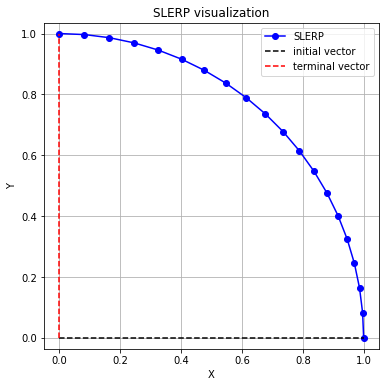

In [35]:
import numpy as np
import math
import matplotlib.pyplot as plt

# --- クォータニオン同士の演算関数 ---

def quat_mult(q1, q2):
    """
    クォータニオンの積を計算する関数。
    q1, q2 はそれぞれ [w, x, y, z] の形式の 4 要素の numpy 配列。
    """
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1*w2 - x1*x2 - y1*y2 - z1*z2
    x = w1*x2 + x1*w2 + y1*z2 - z1*y2
    y = w1*y2 - x1*z2 + y1*w2 + z1*x2
    z = w1*z2 + x1*y2 - y1*x2 + z1*w2
    return np.array([w, x, y, z])

def quat_conjugate(q):
    """
    クォータニオンの共役を計算する関数。
    """
    w, x, y, z = q
    return np.array([w, -x, -y, -z])

def rotate_vector_by_quaternion(v, q):
    """
    3次元ベクトル v を、クォータニオン q による回転を適用して回転させる関数。
    回転は q * (0, v) * q^* の計算で得られる（※qは単位クォータニオンとする）。
    """
    # v をスカラー部 0 のクォータニオンに変換
    v_quat = np.concatenate(([0.0], v))
    q_conj = quat_conjugate(q)
    rotated = quat_mult(quat_mult(q, v_quat), q_conj)
    return rotated[1:]  # 先頭のスカラー部を除いて返す

# --- SLERP の自前実装 ---

def slerp(q0, q1, t):
    """
    2 つの単位クォータニオン q0, q1 の間を補間する SLERP 関数。
    t は補間パラメータ（0 <= t <= 1）。
    ※ q0, q1 は [w, x, y, z] の形式。
    """
    # 事前に正規化（単位クォータニオンであることを確認）
    q0 = q0 / np.linalg.norm(q0)
    q1 = q1 / np.linalg.norm(q1)
    dot = np.dot(q0, q1)
    
    # 内積が負の場合、短い道筋を使うため q1 の符号を反転
    if dot < 0.0:
        q1 = -q1
        dot = -dot

    # 非常に近い場合は線形補間で十分
    DOT_THRESHOLD = 0.9995
    if dot > DOT_THRESHOLD:
        result = q0 + t*(q1 - q0)
        return result / np.linalg.norm(result)
    
    # SLERP の標準式
    theta_0 = np.arccos(dot)       # q0 と q1 のなす角（ラジアン）
    sin_theta_0 = np.sin(theta_0)
    theta_t = theta_0 * t          # 補間時の角度
    sin_theta_t = np.sin(theta_t)
    s0 = np.sin(theta_0 - theta_t) / sin_theta_0
    s1 = sin_theta_t / sin_theta_0
    return s0 * q0 + s1 * q1

# --- 練習問題：補間結果の視覚化 ---

# 例として、q0 は回転なしの単位クォータニオン、q1 は z 軸周りに 90° 回転するクォータニオンとする。
q0 = np.array([1.0, 0.0, 0.0, 0.0])  # 単位クォータニオン（回転なし）
angle = math.radians(90)
q1 = np.array([math.cos(angle/2), 0.0, 0.0, math.sin(angle/2)])  # 90°回転（z軸周り）

# 回転させる初期ベクトル（例として x 軸方向のベクトル）
v = np.array([1.0, 0.0, 0.0])

# 補間パラメータ t を 0 から 1 まで変化させたときの回転結果を計算
ts = np.linspace(0, 1, 20)
v_rotated_list = []

for t in ts:
    q_interp = slerp(q0, q1, t)
    v_rot = rotate_vector_by_quaternion(v, q_interp)
    v_rotated_list.append(v_rot)

v_rotated = np.array(v_rotated_list)

# 補間結果を 2D プロット（x-y 平面）で視覚化
plt.figure(figsize=(6,6))
# 補間された各回転結果の点をプロット
plt.plot(v_rotated[:,0], v_rotated[:,1], 'bo-', label='SLERP')
# 初期ベクトル（回転前）
plt.plot([0, v[0]], [0, v[1]], 'k--', label='initial vector')
# 最終的な回転結果（q1 による回転）
v_final = rotate_vector_by_quaternion(v, q1)
plt.plot([0, v_final[0]], [0, v_final[1]], 'r--', label='terminal vector')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SLERP visualization')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()
